## Lecture Notes (Causal Forest)
The splitting subsample is used to perform the splits and thus grow the tree. The estimating subsample is then used to make the predictions. That is, all observations in the estimating subsample are dropped down the previously-grown tree until it falls into a terminal node. The prediction of the treatment effects is then given by the difference in the average outcomes between the treated and the untreated observations of the estimating subsample in the terminal nodes. 

A typical regression tree might split the data by asking, ‚ÄúWhat variable and value would reduce the mean squared error the most if we made a split at that value of that variable?‚Äù In doing so, the typical tree predicts $ùëå$.

We are interested in the treatment effect for an individual, though. The problem here is that we cannot observe this‚Äîremember, someone is only assigned to one of the conditions. What do we do instead? We get the difference in $ùëå$
between the treatment and control conditions within a leaf of the tree, and we call that the treatment effect. The causal tree uses splitting criteria that explicitly balances the two things we are trying to do: first, finding where treatment effects most differ, and second, estimating the treatment effects accurately. Thus, the tree is ‚Äúcausal‚Äù because it is fit by asking the data, ‚ÄúWhere can we make a split that will produce the biggest difference in treatment effects across leaves, but still give us an accurate estimate of the treatment effect?‚Äù

**Formally:**

For each sample observe the triple $\left(Y_{i}^{\mathrm{obs}}, X_{i}, W_{i}\right)$. For a sample $\mathcal{S}$ let $\mathcal{S}_{\text {treat }}$ and $\mathcal{S}_{\text {control }}$ denote the subsamples of treated and control units, respectively, with cardinality $N_{\text {treat }}$ and $N_{\text {control }}$ respectively, and let $p=N_{\text {treat }} / N$ be the share of treated units. The concept of a tree remains the same as in before. Given a tree (partition) $\Pi$, define for all $x$ and both treatment levels $w$ the population average outcome

$$
\mu(w, x ; \Pi) \equiv \mathbb{E}\left[Y_{i}(w) \mid X_{i} \in \ell(x ; \Pi)\right]
$$

and the average causal effect

$$
\tau(x ; \Pi) \equiv \mathbb{E}\left[Y_{i}(1)-Y_{i}(0) \mid X_{i} \in \ell(x ; \Pi)\right]=\mu(1, x ; \Pi)-\mu(0, x ; \Pi).
$$

The estimated counterparts are

$$
\begin{aligned}
\hat{\mu}(w, x ; \mathcal{S}, \Pi) & \equiv \frac{1}{\#\left(\left\{i \in \mathcal{S}_{w}: X_{i} \in \ell(x ; \Pi)\right\}\right)} \sum_{i \in S_{w}: X_{i} \in \ell(x ; \Pi)} Y_{i}^{\mathrm{obs}} \\
\text{ and }\quad \hat{\tau}(x ; \mathcal{S}, \Pi) & \equiv \hat{\mu}(1, x ; \mathcal{S}, \Pi)-\hat{\mu}(0, x ; \mathcal{S}, \Pi).
\end{aligned}
$$

**Extensions to causal trees:**

- causal random forests
- inference for causal trees and causal random forests
- local linear random forests

## Introduction to Statistical Learning

### Lab: Decision Trees

In [13]:
library(tree)
library(ISLR)
suppressMessages(attach(Carseats))
High <- ifelse (Sales <= 8," No"," Yes ")
Carseats <- data.frame(Carseats ,High)
head(Carseats)

Sales CompPrice Income Advertising Population Price ShelveLoc Age Education
1  9.50 138        73    11          276        120   Bad       42  17       
2 11.22 111        48    16          260         83   Good      65  10       
3 10.06 113        35    10          269         80   Medium    59  12       
4  7.40 117       100     4          466         97   Medium    55  14       
5  4.15 141        64     3          340        128   Bad       38  13       
6 10.81 124       113    13          501         72   Bad       78  16       
  Urban US  High 
1 Yes   Yes  Yes 
2 Yes   Yes  Yes 
3 Yes   Yes  Yes 
4 Yes   Yes  No  
5 Yes   No   No  
6 No    Yes  Yes

In [17]:
### Building a True on "High" using all variables but(!) "Sales"
tree.carseats <- tree(High‚àº.-Sales ,Carseats)

In [18]:
summary(tree.carseats)
### Misclassification error rate (=training error rate) = 9%


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

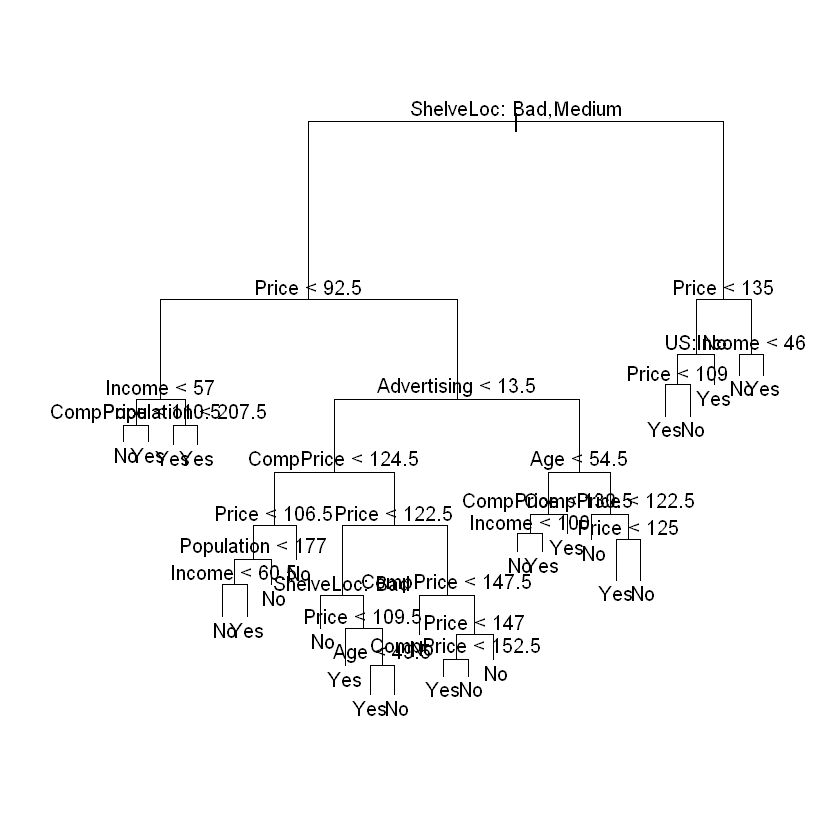

In [24]:
plot(tree.carseats)
text(tree.carseats ,pretty =0)

"In order to properly evaluate the performance of a classification tree on
these data, we must estimate the test error rather than simply computing
the training error. We split the observations into a training set and a test
set, build the tree using the training set, and evaluate its performance on
the test data."

In [28]:
set.seed (2)
train <- sample(1:nrow(Carseats),200)
Carseats.test <- Carseats[-train,]
High.test <- High[-train]

In [29]:
tree.carseats <- tree(High‚àº.-Sales ,Carseats ,subset =train)
tree.pred <- predict (tree.carseats ,Carseats.test ,type ="class") ### "class" must be specified for classification output
table(tree.pred ,High.test)

         High.test
tree.pred  No  Yes 
     No   104    33
     Yes   13    50

## 8.3.3 Bagging and Random Forests

In [37]:
library(randomForest)
library (MASS)

In [39]:
set.seed (1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
boston.test=Boston[-train ,"medv"]

rf.boston <- randomForest(medv‚àº.
                          ,data=Boston 
                          ,subset=train 
                          ,mtry=6                   # number of trees in the forest
                          ,importance =TRUE)
yhat.rf <- predict (rf.boston ,newdata =Boston[-train,])
mean((yhat.rf - boston.test)^2)

[1] 19.43268

Two measures of variable importance are reported. The former is based
upon the mean decrease of accuracy in predictions on the out of bag samples
when a given variable is excluded from the model. The latter is a measure
of the total decrease in node impurity that results from splits over that
variable, averaged over all trees

In [41]:
importance(rf.boston)

%IncMSE   IncNodePurity
crim    16.830544 1108.32195   
zn       3.753590   98.71828   
indus    5.227791  661.61409   
chas     0.633767   38.60089   
nox     13.987390  868.27085   
rm      32.636009 7824.38145   
age     16.289102  588.78611   
dis     10.644205  740.85676   
rad      2.452597   88.61603   
tax      9.526572  390.41449   
ptratio  8.892724  915.74482   
black    8.201708  291.14557   
lstat   26.710245 5735.52710

The results indicate that across all of the trees considered in the random
forest, the wealth level of the community (lstat) and the house size (rm)
are by far the two most important variables.

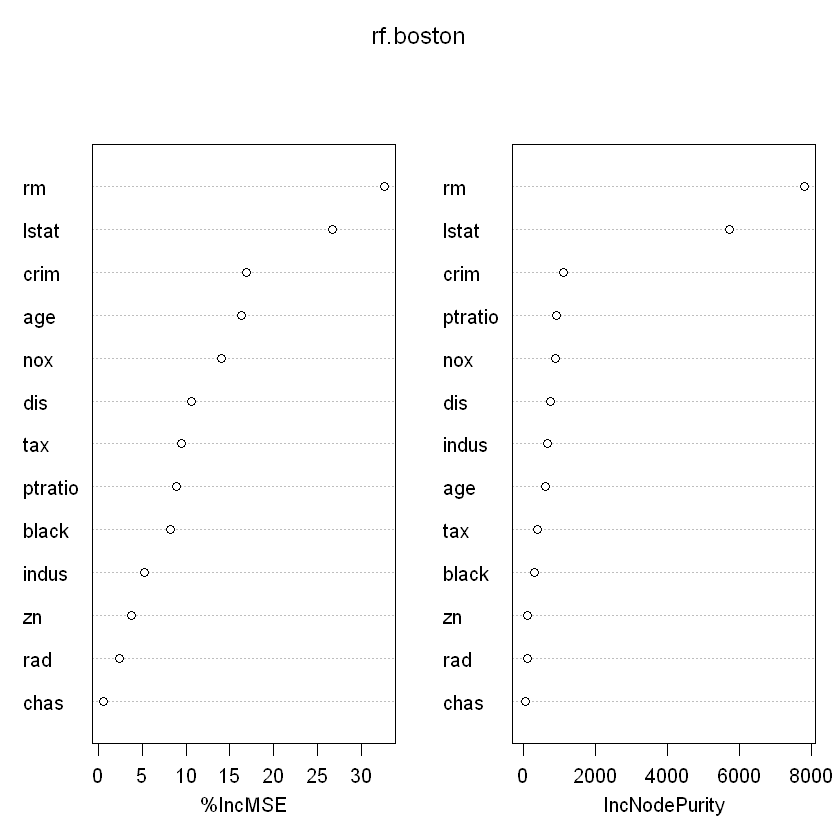

In [42]:
varImpPlot(rf.boston)

## Causal Forest (grf package examples)

In [54]:
n <- 100
p <- 10
X <- matrix(rnorm(n * p), n, p)     # 100x10 random X matrix
W <- rbinom(n, 1, 0.5)              # random treatment assignment variable (0,1)
Y <- pmax(X[, 1], 0) * W + X[, 2] + pmin(X[, 3], 0) + rnorm(n)  # pmax(X[, 1], 0): returns the maximum of X[,1] and 0

In [83]:
#### True ATE

mean(pmax(X[, 1], 0) * W)

[1] 0.2529843

In [58]:
##### Causal Forest
c.forest <- causal_forest(X, Y, W)
c.forest

GRF forest object of type causal_forest 
Number of trees: 2000 
Number of training samples: 100 
Variable importance: 
    1     2     3     4     5     6     7     8     9    10 
0.067 0.052 0.051 0.109 0.080 0.086 0.062 0.058 0.043 0.094 

In [79]:
#### Predict using the forest

X.test <- matrix(0, 100, p)
X.test[, 1] <- seq(-2, 2, length.out = 100)
c.pred <- predict(c.forest, X.test)

In [78]:
#### Predict on out-of-bag training samples.

c.pred2 <- predict(c.forest)

In [80]:
average_treatment_effect(c.forest, target.sample = "all")

estimate   std.err 
0.7474442 0.2572527

In [86]:
average_treatment_effect(c.forest, target.sample = "treated")

estimate   std.err 
0.7382229 0.2622238

In [96]:
library(class)

In [104]:
Y <- as.matrix(Y)
dim(Y)

[1] 100   1

In [110]:
W <- as.matrix(W)
dim(W)

[1] 100   1

In [112]:
dim(X)

[1] 100  10

In [109]:
nn5 <- knn(Y ~ X + W,X,X.test,k=5)

ERROR: Error in dim(data) <- dim: ung√ºltiges erstes Argument


In [98]:
lm(Y~W+X)


Call:
lm(formula = Y ~ W + X)

Coefficients:
(Intercept)            W           X1           X2           X3           X4  
  -0.430854     0.532815     0.298002     0.813201     0.450430     0.052990  
         X5           X6           X7           X8           X9          X10  
  -0.003465     0.065096     0.039813     0.061295     0.030652     0.002744  


In [ ]:
#install.packages(tidyverse)

In [2]:
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(grf))         
suppressMessages(library(estimatr))

In [3]:
# Generate data.
n <- 2000
p <- 10
X <- matrix(rnorm(n * p), n, p)
X.test <- matrix(0, 101, p)
X.test[, 1] <- seq(-2, 2, length.out = 101)

## Causal Forest Example

[Link to Description of grf package](https://grf-labs.github.io/grf/reference/causal_forest.html)

In [9]:
# \donttest{
# Train a causal forest.
n <- 500
p <- 10
X <- matrix(rnorm(n * p), n, p)
W <- rbinom(n, 1, 0.5)
Y <- pmax(X[, 1], 0) * W + X[, 2] + pmin(X[, 3], 0) + rnorm(n)
c.forest <- causal_forest(X, Y, W)

# Predict using the forest.
X.test <- matrix(0, 101, p)
X.test[, 1] <- seq(-2, 2, length.out = 101)
c.pred <- predict(c.forest, X.test)

# Predict on out-of-bag training samples.
c.pred <- predict(c.forest)

# Predict with confidence intervals; growing more trees is now recommended.
c.forest <- causal_forest(X, Y, W, num.trees = 4000)
c.pred <- predict(c.forest, X.test, estimate.variance = TRUE)

# In some examples, pre-fitting models for Y and W separately may
# be helpful (e.g., if different models use different covariates).
# In some applications, one may even want to get Y.hat and W.hat
# using a completely different method (e.g., boosting).
n <- 2000
p <- 20
X <- matrix(rnorm(n * p), n, p)
TAU <- 1 / (1 + exp(-X[, 3]))
W <- rbinom(n, 1, 1 / (1 + exp(-X[, 1] - X[, 2])))
Y <- pmax(X[, 2] + X[, 3], 0) + rowMeans(X[, 4:6]) / 2 + W * TAU + rnorm(n)

forest.W <- regression_forest(X, W, tune.parameters = "all")
W.hat <- predict(forest.W)$predictions

forest.Y <- regression_forest(X, Y, tune.parameters = "all")
Y.hat <- predict(forest.Y)$predictions

forest.Y.varimp <- variable_importance(forest.Y)

# Note: Forests may have a hard time when trained on very few variables
# (e.g., ncol(X) = 1, 2, or 3). We recommend not being too aggressive
# in selection.
selected.vars <- which(forest.Y.varimp / mean(forest.Y.varimp) > 0.2)

tau.forest <- causal_forest(X[, selected.vars], Y, W,
  W.hat = W.hat, Y.hat = Y.hat,
  tune.parameters = "all"
)
tau.hat <- predict(tau.forest)$predictions
# }

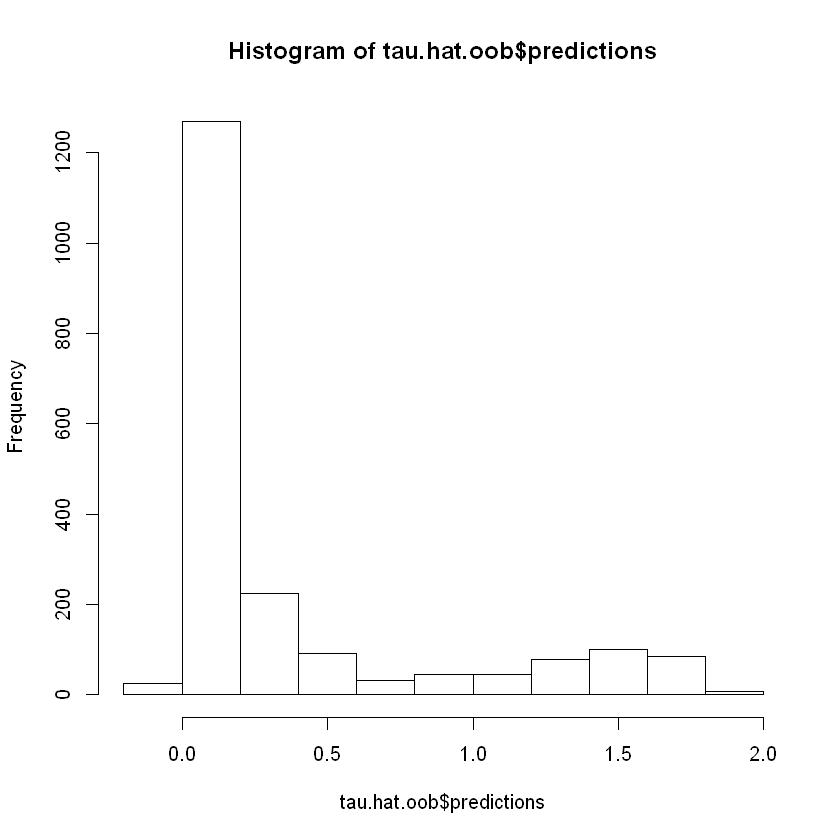

estimate    std.err 
0.38489360 0.04771925

estimate    std.err 
0.43486193 0.04817255

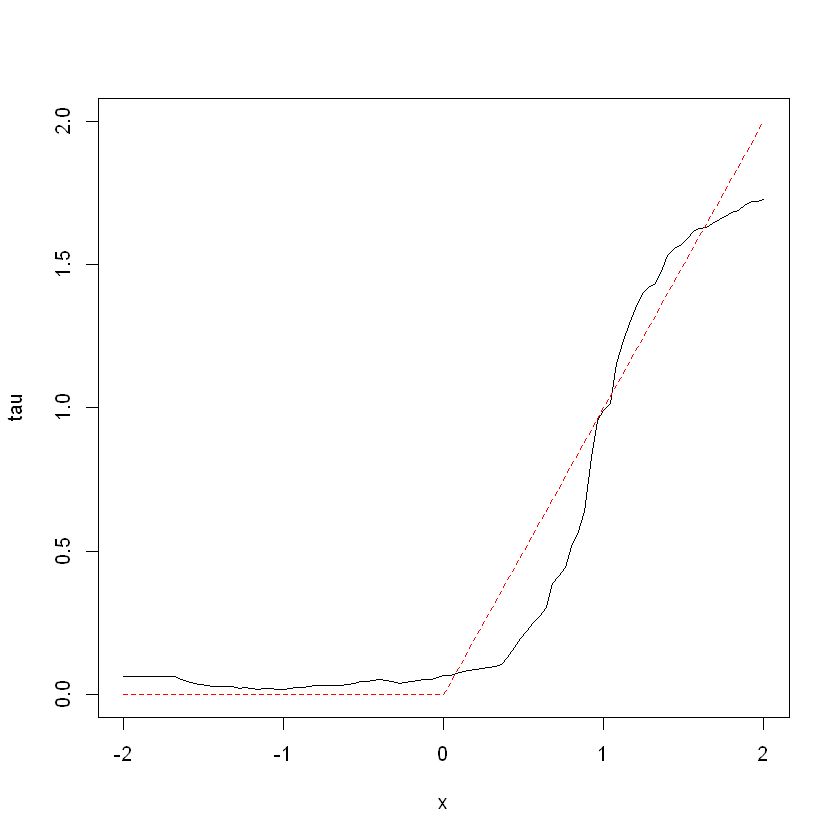


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction         1.011007   0.075029 13.4750 < 2.2e-16 ***
differential.forest.prediction 0.681677   0.212508  3.2078 0.0006741 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


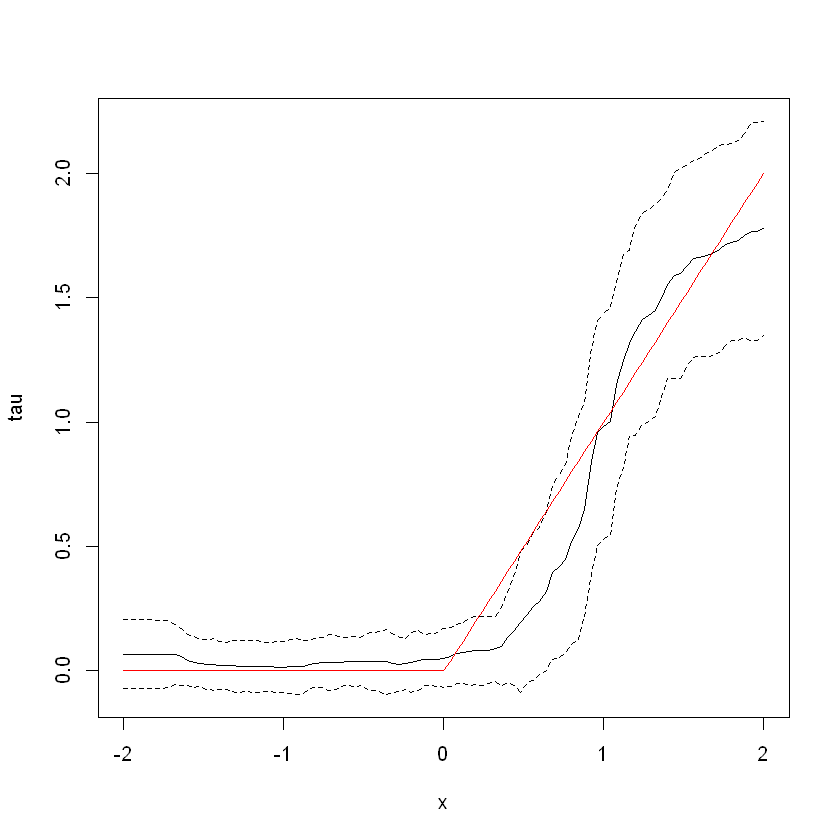

In [8]:
# Generate data.
n <- 2000
p <- 10
X <- matrix(rnorm(n * p), n, p)
X.test <- matrix(0, 101, p)
X.test[, 1] <- seq(-2, 2, length.out = 101)

# Train a causal forest.
W <- rbinom(n, 1, 0.4 + 0.2 * (X[, 1] > 0))
Y <- pmax(X[, 1], 0) * W + X[, 2] + pmin(X[, 3], 0) + rnorm(n)
tau.forest <- causal_forest(X, Y, W)

# Estimate treatment effects for the training data using out-of-bag prediction.
tau.hat.oob <- predict(tau.forest)
hist(tau.hat.oob$predictions)

# Estimate treatment effects for the test sample.
tau.hat <- predict(tau.forest, X.test)
plot(X.test[, 1], tau.hat$predictions, ylim = range(tau.hat$predictions, 0, 2), xlab = "x", ylab = "tau", type = "l")
lines(X.test[, 1], pmax(0, X.test[, 1]), col = 2, lty = 2)

# Estimate the conditional average treatment effect on the full sample (CATE).
average_treatment_effect(tau.forest, target.sample = "all")

# Estimate the conditional average treatment effect on the treated sample (CATT).
average_treatment_effect(tau.forest, target.sample = "treated")

# Add confidence intervals for heterogeneous treatment effects; growing more trees is now recommended.
tau.forest <- causal_forest(X, Y, W, num.trees = 4000)
tau.hat <- predict(tau.forest, X.test, estimate.variance = TRUE)
sigma.hat <- sqrt(tau.hat$variance.estimates)
plot(X.test[, 1], tau.hat$predictions, ylim = range(tau.hat$predictions + 1.96 * sigma.hat, tau.hat$predictions - 1.96 * sigma.hat, 0, 2), xlab = "x", ylab = "tau", type = "l")
lines(X.test[, 1], tau.hat$predictions + 1.96 * sigma.hat, col = 1, lty = 2)
lines(X.test[, 1], tau.hat$predictions - 1.96 * sigma.hat, col = 1, lty = 2)
lines(X.test[, 1], pmax(0, X.test[, 1]), col = 2, lty = 1)

# In some examples, pre-fitting models for Y and W separately may
# be helpful (e.g., if different models use different covariates).
# In some applications, one may even want to get Y.hat and W.hat
# using a completely different method (e.g., boosting).

# Generate new data.
n <- 4000
p <- 20
X <- matrix(rnorm(n * p), n, p)
TAU <- 1 / (1 + exp(-X[, 3]))
W <- rbinom(n, 1, 1 / (1 + exp(-X[, 1] - X[, 2])))
Y <- pmax(X[, 2] + X[, 3], 0) + rowMeans(X[, 4:6]) / 2 + W * TAU + rnorm(n)

forest.W <- regression_forest(X, W, tune.parameters = "all")
W.hat <- predict(forest.W)$predictions

forest.Y <- regression_forest(X, Y, tune.parameters = "all")
Y.hat <- predict(forest.Y)$predictions

forest.Y.varimp <- variable_importance(forest.Y)

# Note: Forests may have a hard time when trained on very few variables
# (e.g., ncol(X) = 1, 2, or 3). We recommend not being too aggressive
# in selection.
selected.vars <- which(forest.Y.varimp / mean(forest.Y.varimp) > 0.2)

tau.forest <- causal_forest(X[, selected.vars], Y, W,
                            W.hat = W.hat, Y.hat = Y.hat,
                            tune.parameters = "all")

# Check whether causal forest predictions are well calibrated.
test_calibration(tau.forest)

# Treatment effects using matching estimators
**Wager, Athey (2019): Estimation and Inference of Heterogeneous Treatment Effects using Random Forests**

## 2.1 Treatment Estimation with Unconfoundedness

we then posit the existence of potential outcomes $Y^{(1)}_i$ and $Y^{(0)}_i$ corresponding respectively to
the response the i-th subject would have experienced with and without the treatment, and define the treatment effect at x as $\tau(x) = E[Y^{(1)}_i - Y^{(0)}_i | X_i = x] $.

Our goal is to estimate this function $\tau(x)$. The main difficulty is that we can only ever observe one of the two potential outcomes $Y^{(0)}_i$ or $Y^{(1)}_i$ for a given training example, and so cannot directly train machine learning method on differences of the form $Y^{(0)}_i - Y^{(1)}_i$.

In general, we cannot estimate $\tau(x)$ simply from the observed data $(Xi; Yi; Wi)$ without further restrictions on the data generating distribution. A standard way to make progress is to assume unconfoundedness [Rosenbaum and Rubin, 1983], i.e., that the treatment assignment $W_i$ is independent of the potential outcomes for $Y_i$ conditional on $X_i$:(...).

The motivation behind this unconfoundedness is that, given continuity assumptions, it effectively implies that we can treat nearby observations in x-space as having come from a randomized experiment; thus, nearest-neighbor matching and other local methods will in general be consistent for $\tau(x)$.

## 2.2 From Regression Trees to Causal Trees and Forests

At a high level, trees and forests can be thought of as nearest neighbor methods with an
adaptive neighborhood metric. Given a test point x, classical methods such as k-nearest
neighbors seek the k closest points to x according to some pre-specied distance measure,
e.g., Euclidean distance. In contrast, tree-based methods also seek to nd training examples
that are close to x, but now closeness is dened with respect to a decision tree, and the
closest points to x are those that fall in the same leaf as it. The advantage of trees is that
their leaves can be narrower along the directions where the signal is changing fast and wider
along the other directions, potentially leading a to a substantial increase in power when the
dimension of the feature space is even moderately large.

## How to check for Heterogeneous Treatment Effects?

**Figure 2**: Histogram of out-of-bag CATE estimates from a causal forest trained as in Algorithm 1.

As seen in Figure 2, the causal forest CATE estimates obviously exhibit variation; but this does not
automatically imply that ^ (ÙÄÄÄi)(Xi) is a better estimate of  (Xi) than the overall average treatment
eect estimate ^ from (8).

A first, simple approach to testing for heterogeneity involves grouping observations according
to whether their out-of-bag CATE estimates are above or below the median CATE estimate, and
then estimating average treatment eects in these two subgroups separately using the doubly robust
approach (8). This procedure is somewhat heuristic, as the \high" and \low" subgroups are not
independent of the scoresbÙÄÄÄ
i used to estimate the within-group eects; however, the subgroup denition
does not directly depend on the outcomes or treatments (Yi;Wi) themselves, and it appears that this
approach can provide at least qualitative insights about the strength of heterogeneity.

We also try a second test for heterogeneity, motivated by the \best linear predictor" method of
Chernozhukov, Demirer, Duo, and Fernandez-Val (2018b), that seeks to t the CATE as a linear
function of the the out-of-bag causal forest estimates ^ (ÙÄÄÄi)(Xi).

Thus, at
least if we insist on cluster-robust inference, any treatment heterogeneity that may be present appears
to be relatively weak, and causal forests do not identify subgroups with eects that obviously stand out.

**Both "methods" test for general treatment heterogeneity. If the researcher has some more specific hypotheses in the context of her research question, then other following procedures might work better in order to detect heterogeneity!!!**

**Figure 3**: Panel (a) plots students' CATE estimates against school-level mindset X1.

**We can graphically check for treatment heterogeneity by plotting the treatment effects grouped by the values of a chosen variable** In figure 3 (a) these are the values of the Variable X1!

**Last possible check**: $variable importance$ function, to see if a possible variable explaining heterogeneity was important in split taking during the forest building process!